In [18]:
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt 


In [19]:
df = pd.read_excel(r"C:\Users\milla\Desktop\Projeto final\data4all_EDA\appointment_prediction_data.xlsx")
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MARIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTONIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARA','INHANGUET√Å':'INHAGUETA','UNIVERSIT√ÅRIO':'UNIVERSITARIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
df['Handcap'].value_counts()

df.drop_duplicates(subset='AppointmentID', keep='first')

df.dropna(subset=["Age"], inplace=True)

## Em comparação ao grupo não-PCD, o grupo com deficiência compareceu mais nas consultas.

In [20]:
df.groupby(['Handcap'])['Compareceu'].mean() 

Handcap
0    0.797647
1    0.818669
Name: Compareceu, dtype: float64

### Quantas consultas foram marcadas para cada especialidade?

In [31]:

df_pcd = df.loc[df['Handcap']==1]


hipertensos_pcd = df_pcd.loc[df_pcd['Hipertension']==1]
alcolismo_pcd = df_pcd.loc[df_pcd['Alcoholism']==1]
diabetes_pcd = df_pcd.loc[df_pcd['Diabetes']==1]

print(f'Foram {len(alcolismo_pcd)} consultas marcadas para Alcoolismo no grupo PCD')
print(f'Foram {len(diabetes_pcd)} consultas marcadas para Diabetes no grupo PCD')
print(f'Foram {len(hipertensos_pcd)} consultas marcadas para Hipertensão no grupo PCD')


Foram 78 consultas marcadas para Alcoolismo no grupo PCD
Foram 398 consultas marcadas para Diabetes no grupo PCD
Foram 966 consultas marcadas para Hipertensão no grupo PCD


### Qual gênero compareceu mais nas consultas marcadas no grupo PCD? Genero Masculino

In [35]:
df_pcd.groupby('Gender')['Compareceu'].mean()

Gender
F    0.812258
M    0.827368
Name: Compareceu, dtype: float64

### Qual a faixa etária que mais compareceu nas consultas marcadas?

In [34]:
df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])
df_pcd.groupby(['Faixa etaria'])['Compareceu'].mean().sort_values(ascending=False)

C:\Users\milla\AppData\Local\Temp\ipykernel_19812\3215571787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])


Faixa etaria
Adultos           0.837809
Idosos            0.835966
Jovens Adultos    0.798165
Adolescentes      0.769231
Crianças          0.622449
Name: Compareceu, dtype: float64

## No geral, incluindo TODAS as consultas, até as imediatas, receber o sms não impactou o grupo PCD, porém se isolarmos as consultas imediatas vemos que sim teve uma pequena diferença, e vamos ver isso mais a frente.

In [27]:
df_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.840376
1    0.749533
Name: Compareceu, dtype: float64

## Alocando as respostas de comparecimentos em grupos de:
### Recebeu o sms - 1. Não recebeu o sms - 0.<br>

## E separando o grupo por consultas realizadas a partir de 3 dias de marcação temos os seguintes resultados:

### No grupo de consultas marcadas para "Diabetes" houve um aumento de 7% no comparecimento de quem recebeu o lembrete por sms.

In [26]:

sms_diabetes_pcd = diabetes_pcd.loc[(diabetes_pcd['time_delta']>2)]
sms_diabetes_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.720000
1    0.791667
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Hipertensão" houve um aumento de 8% no comparecimento de quem recebeu o lembrete por sms. 

In [25]:

sms_hipertensao = hipertensos_pcd.loc[(hipertensos_pcd['time_delta']>2)]
sms_hipertensao.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.707547
1    0.780303
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Alcoolismo" receber SMS não fez diferença.

In [24]:
sms_alcolismo_pcd = alcolismo_pcd.loc[(alcolismo_pcd['time_delta']>2)]
sms_alcolismo_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.888889
1    0.882353
Name: Compareceu, dtype: float64

### Será que com o tempo mais longo de espera de consulta há mais ausência de deficientes? 
### O nível de comparecimento é alto nos primeiros dias, mas quanto mais longe da data a consulta é marcada, as taxas de comparecimento diminuem.

<AxesSubplot:title={'center':'Comparecimento por tempo de espera pela consulta'}, xlabel='Dias depois da marcação'>

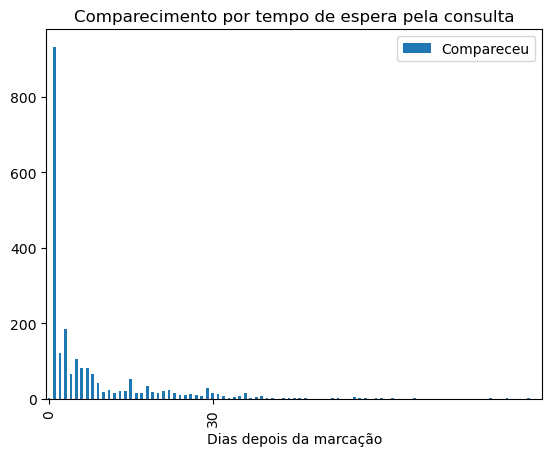

In [36]:
df_pcd.pivot_table(index='time_delta', aggfunc='count', values='Compareceu').plot(kind='bar', xticks= (np.arange(0,60,30)), title = 'Comparecimento por tempo de espera pela consulta', xlabel = 'Dias depois da marcação')

Solução: Quanto mais cedo as consultas forem marcadas, e tendo sido reforçados os lembretes por sms, a taxa de AUSÊNCIA do grupo PCD diminuirá.